In [26]:
from google.colab import files
uploaded = files.upload()

Saving Mall Customer Segmentation Data.zip to Mall Customer Segmentation Data (1).zip


In [27]:
import zipfile

with zipfile.ZipFile("Mall Customer Segmentation Data.zip", "r") as zip_ref:
    zip_ref.extractall("mall_data")


In [28]:
import os

os.listdir("mall_data")


['Mall_Customers.csv']

In [29]:
import pandas as pd

df = pd.read_csv("mall_data/Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [30]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [31]:
df.isnull().sum()


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [33]:
print("Columns:", df.columns.tolist())
print("Dataset shape:", df.shape)


Columns: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Dataset shape: (200, 5)


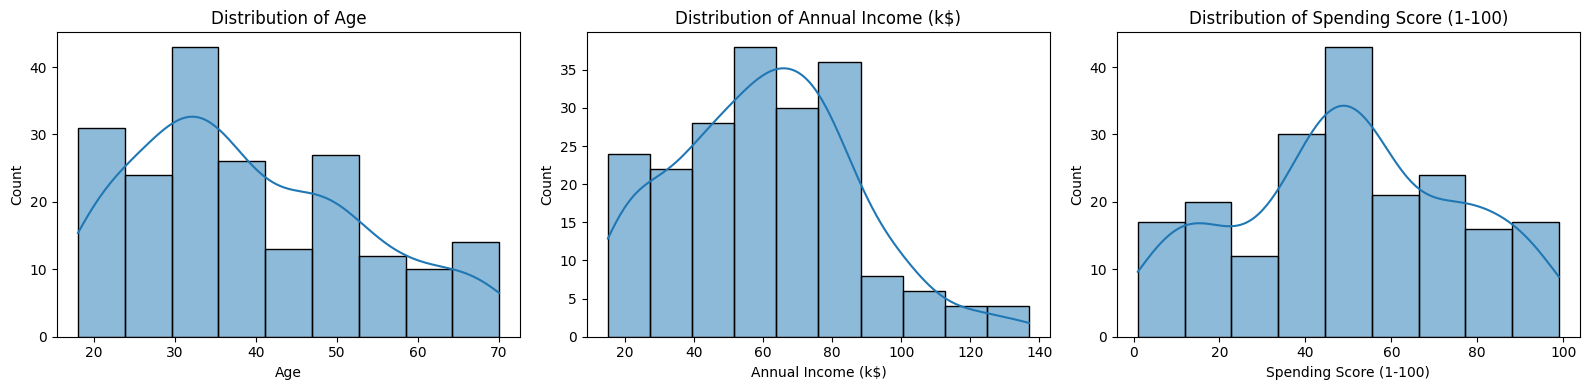

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 4))
for idx, column in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, idx+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


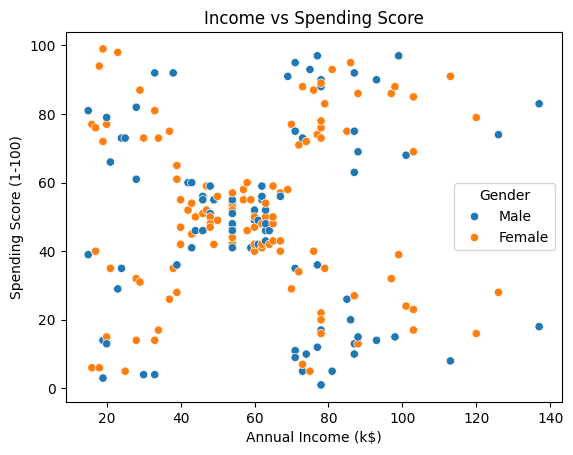

In [35]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title("Income vs Spending Score")
plt.show()


In [36]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


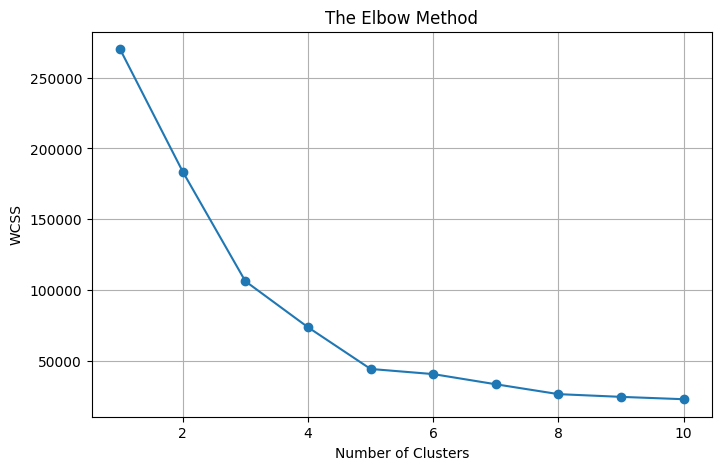

In [37]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


Trains a K-Means model to group the data into 5 clusters and returns the cluster label for each customer

In [38]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)


The plot shows customer clusters identified by the K-Means algorithm.
 Each cluster has a different color, and the yellow X markers represent the centroids of each cluster

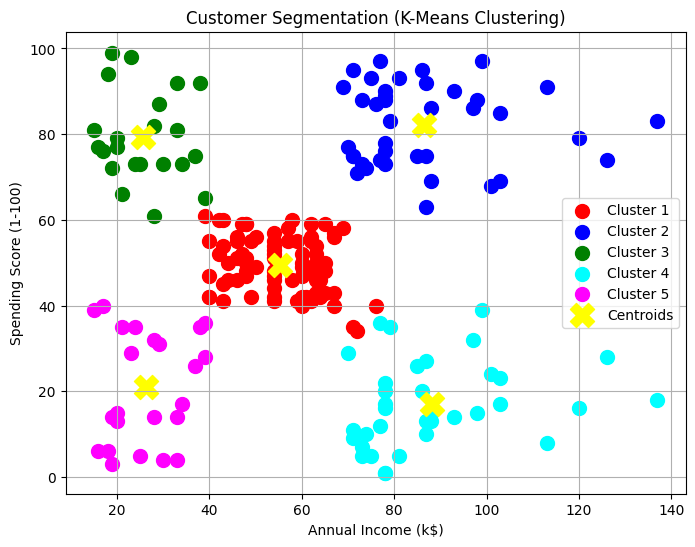

In [39]:
import matplotlib.pyplot as plt

X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

X_array = X.to_numpy()

plt.figure(figsize=(8, 6))
plt.scatter(X_array[y_kmeans == 0, 0], X_array[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_array[y_kmeans == 1, 0], X_array[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_array[y_kmeans == 2, 0], X_array[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_array[y_kmeans == 3, 0], X_array[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_array[y_kmeans == 4, 0], X_array[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids', marker='X')

plt.title('Customer Segmentation (K-Means Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()


In [40]:
from sklearn.preprocessing import StandardScaler

X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


DBSCAN is applied to cluster customers based on income and spending, then the cluster labels are added to the DataFrame, and the number of customers per cluster is displayed.



In [41]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

df['DBSCAN_Cluster'] = db_labels
print(df['DBSCAN_Cluster'].value_counts())


DBSCAN_Cluster
 0    157
 1     35
-1      8
Name: count, dtype: int64


This scatter plot visualizes DBSCAN clustering results. Colors represent different clusters (or outliers). The x-axis shows annual income, and the y-axis shows spending score



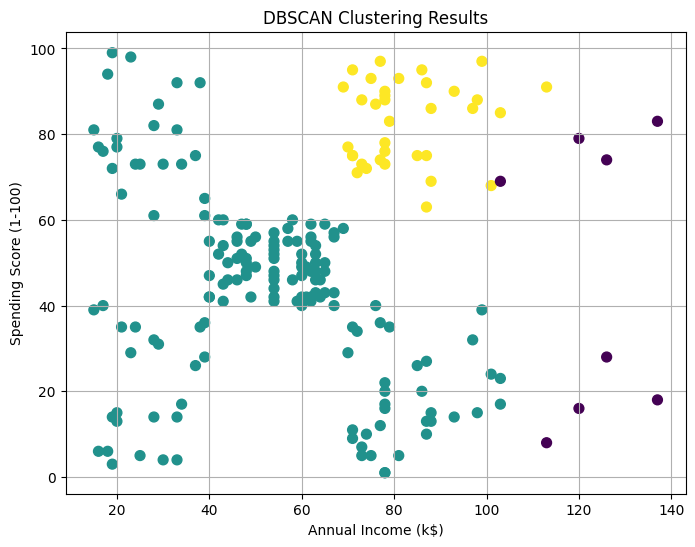

In [42]:
plt.figure(figsize=(8,6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=db_labels, cmap='viridis', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering Results')
plt.grid(True)
plt.show()


Adds the DBSCAN cluster labels to the DataFrame and calculates the average spending score for each cluster. This helps analyze customer behavior per group



In [43]:
df['DBSCAN_Cluster'] = db_labels
avg_spending_per_cluster = df.groupby('DBSCAN_Cluster')['Spending Score (1-100)'].mean()
print("Average Spending Score per Cluster:\n", avg_spending_per_cluster)


Average Spending Score per Cluster:
 DBSCAN_Cluster
-1    46.875000
 0    43.101911
 1    82.800000
Name: Spending Score (1-100), dtype: float64


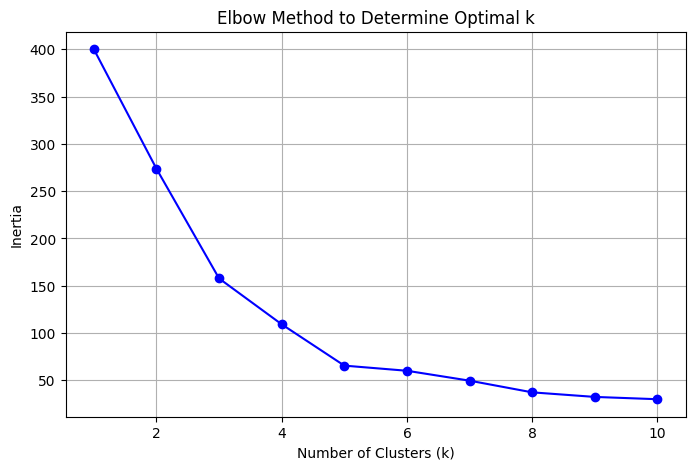

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.grid(True)
plt.show()


 applies KMeans clustering to the scaled data, assigns cluster labels to each customer, and then prints the number of customers in each cluster

In [45]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = kmeans_labels
cluster_counts = df['KMeans_Cluster'].value_counts().sort_index()
print("Number of customers in each group (KMeans):\n", cluster_counts)


Number of customers in each group (KMeans):
 KMeans_Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64


This cell visualizes the customer segments discovered using K-Means clustering on scaled data. Each cluster is shown with a unique color, and the cluster centers are marked with black "X" symbols.



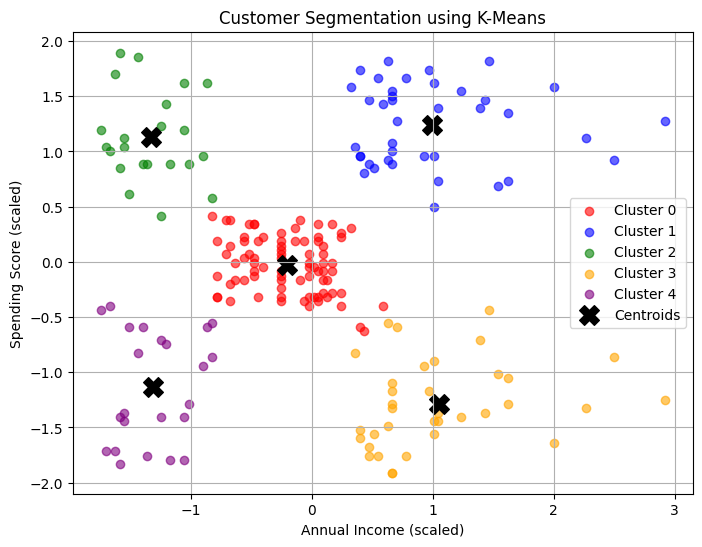

In [46]:
import matplotlib.pyplot as plt

colors = ['red', 'blue', 'green', 'orange', 'purple']

plt.figure(figsize=(8, 6))
for cluster in range(kmeans.n_clusters):
    cluster_data = X_scaled[kmeans_labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1],
                color=colors[cluster], label=f'Cluster {cluster}', alpha=0.6)


centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], color='black', marker='X', s=200, label='Centroids')

plt.title('Customer Segmentation using K-Means')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.grid(True)
plt.show()


Visualizes DBSCAN clusters on scaled data using different colors, highlights outliers in gray, and adds a legend for clarity

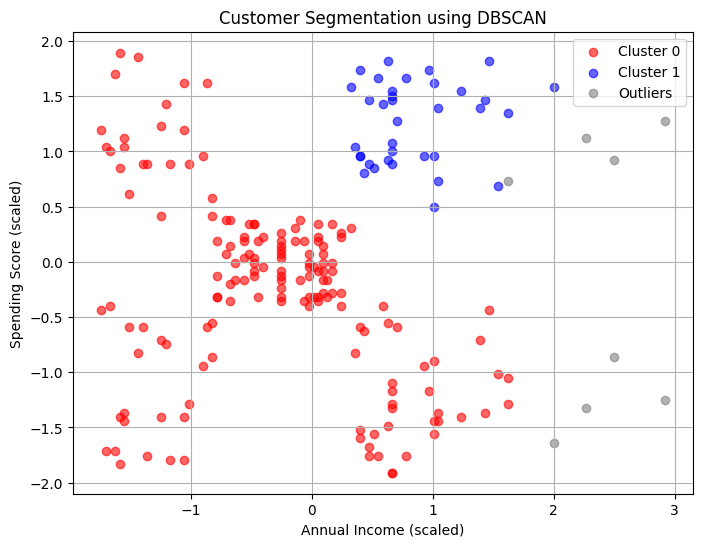

In [47]:
import matplotlib.pyplot as plt

colors = ['red', 'blue', 'green', 'orange', 'purple', 'gray']

plt.figure(figsize=(8, 6))

unique_labels = set(db_labels)
for label in unique_labels:
    cluster_points = X_scaled[db_labels == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                c=colors[label] if label != -1 else 'gray',
                label=f'Cluster {label}' if label != -1 else 'Outliers',
                alpha=0.6)

plt.title('Customer Segmentation using DBSCAN')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.grid(True)
plt.show()


In [49]:
import joblib
joblib.dump(kmeans, 'kmeans_model.joblib')


['kmeans_model.joblib']

In [50]:

joblib.dump(dbscan, 'dbscan_model.joblib')


['dbscan_model.joblib']